# House Prices Advanced Regression Techniques

## Seminarski rad na kursu Masinsko ucenje - Matematicki fakultet, Univerzitet u Beogradu
 
### Autor: Denis Alicic
 

### Skup podataka: [link](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

### Detaljni opis podataka je dostupan u [fajlu](../Dataset/data_description.txt)

## Preprocesiranje podataka

In [224]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import scipy

from scipy.stats import skew
from scipy.special import boxcox1p

In [225]:
# Ucitavanje podataka
train = pd.read_csv("../Dataset/train.csv")
test = pd.read_csv("../Dataset/test.csv")

In [226]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [227]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [228]:
# Osnovne statistike
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [229]:
# Odmah vidimo da postoji Id, koji nam nece trebati
# Kao i da postoje kolone koje sadrze dosta NaN i 0 vrednosti, pa hajde da to malo istrazimo o cemu se radi
train_ID = train["Id"]
test_ID = test["Id"]
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

In [230]:
numericki = [f for f in train.columns if train.dtypes[f] != 'object']
kategoricki = [f for f in train.columns if train.dtypes[f] == 'object']

In [231]:
numericki

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f26c1020cd0>,
      dtype=object)

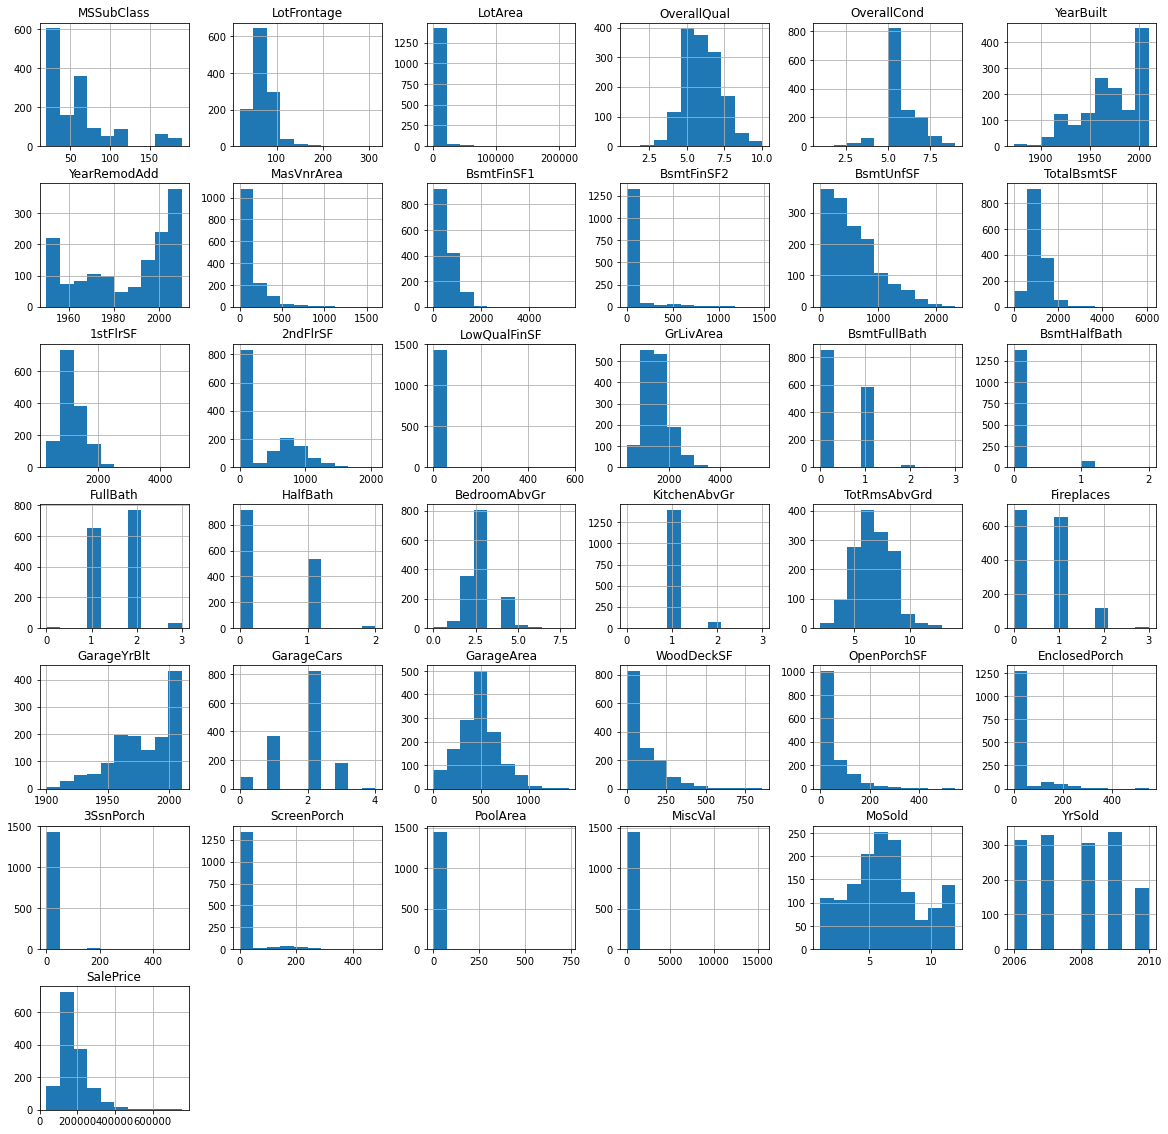

In [232]:
#Skoro ni jedan ne prati normalnu raspodelu, moracemo da vrsimo neke korekcije
train[numericki].hist(figsize=(20, 20))

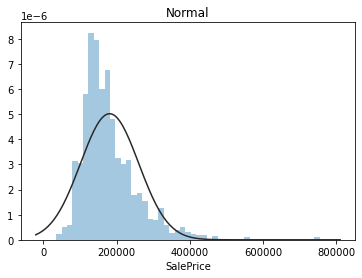

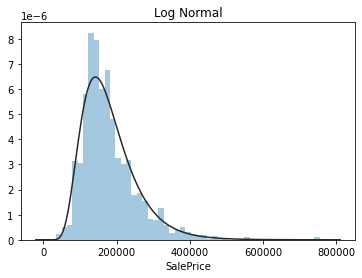

In [233]:
# Analiza ciljne promenljive
y = train['SalePrice']
plt.figure(1); plt.title('Normal')
sb.distplot(y, kde=False, fit=scipy.stats.norm)
plt.figure(2); plt.title('Log Normal')
sb.distplot(y, kde=False, fit=scipy.stats.lognorm)

<ipython-input-234-0b3df6122c13>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


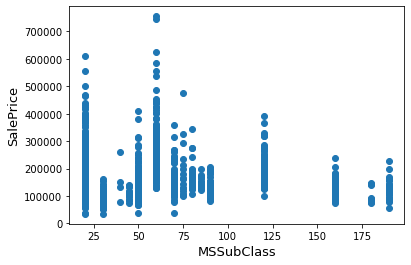

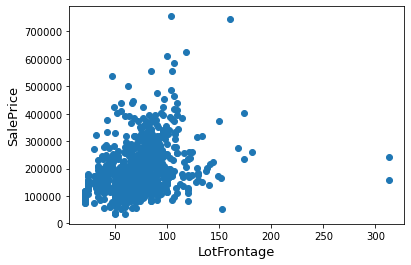

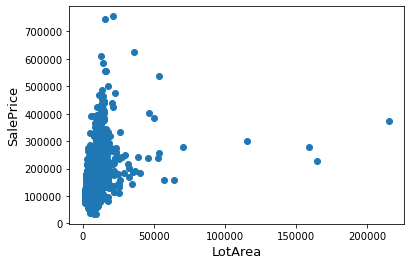

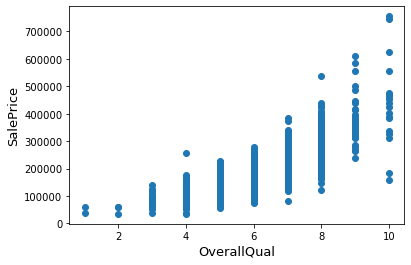

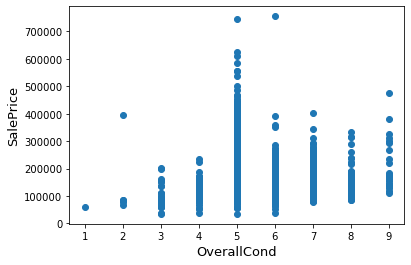

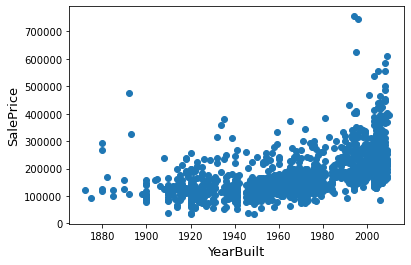

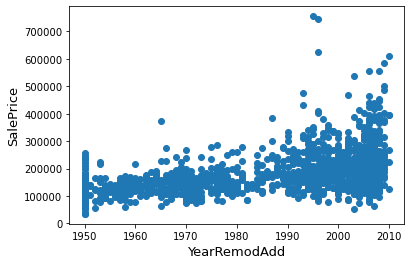

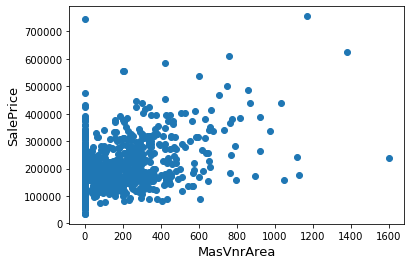

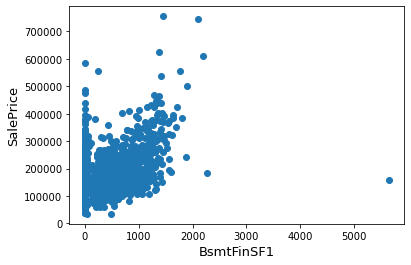

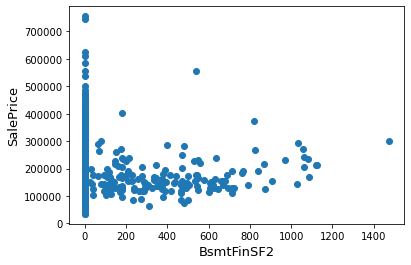

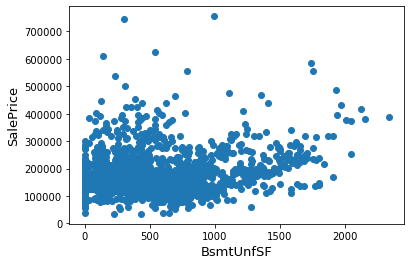

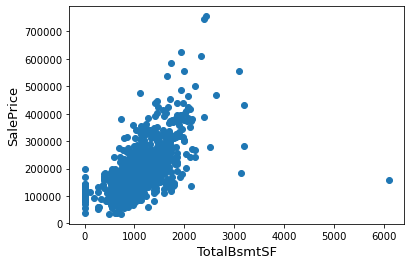

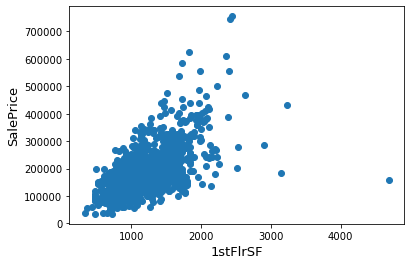

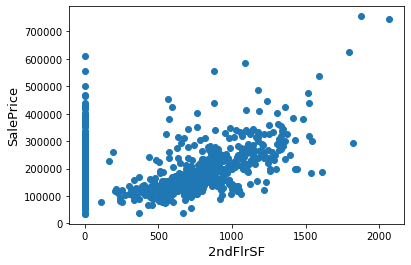

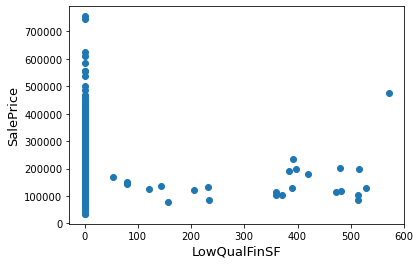

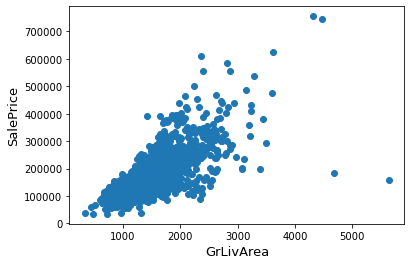

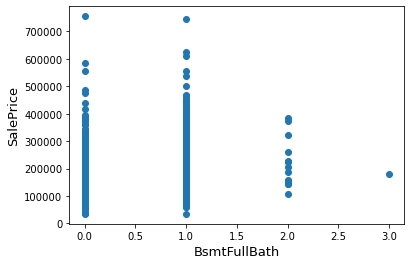

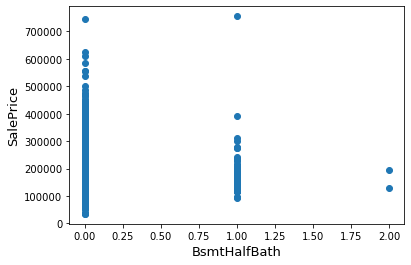

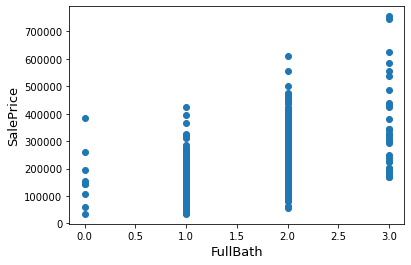

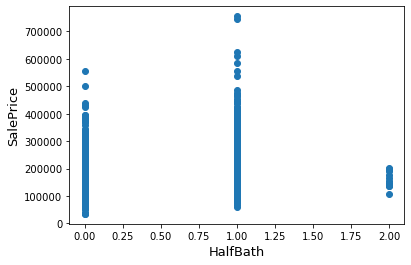

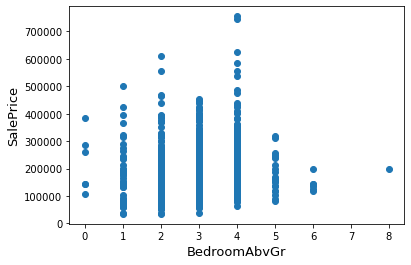

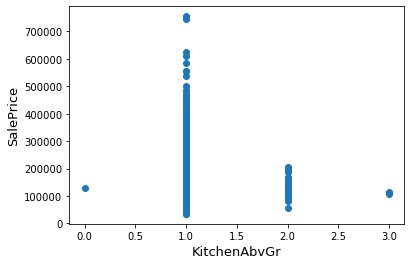

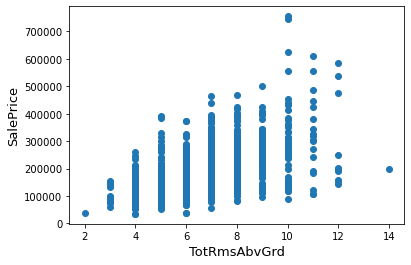

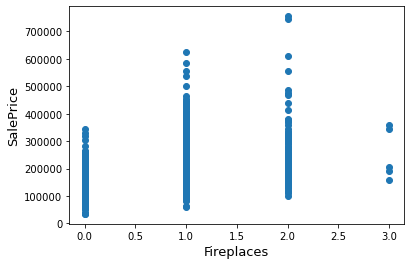

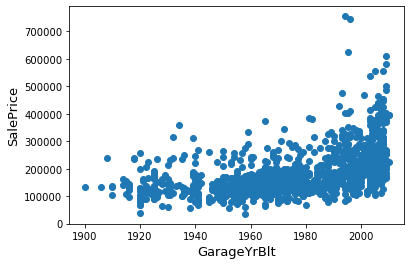

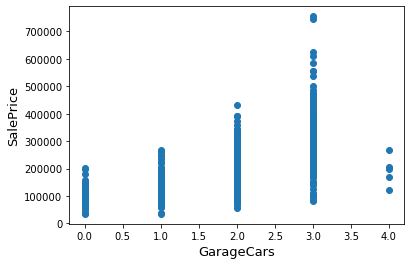

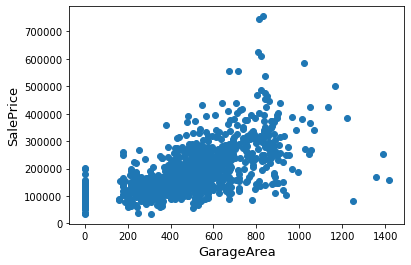

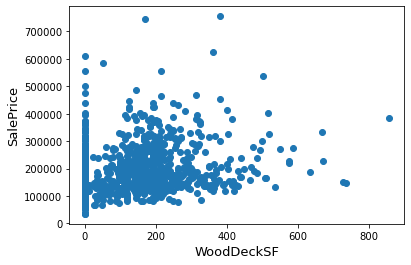

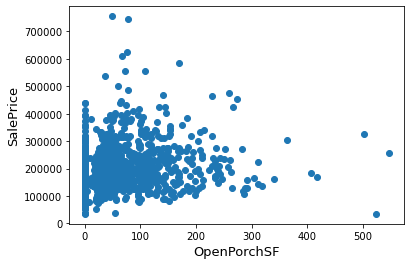

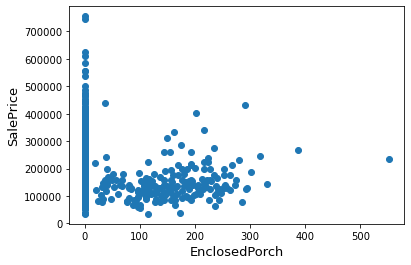

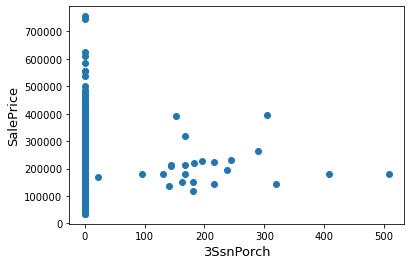

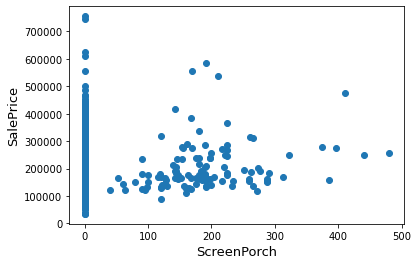

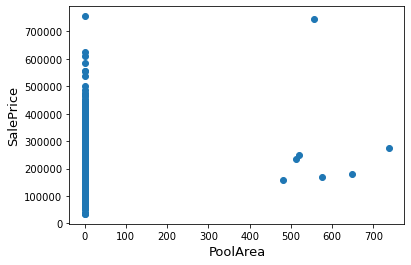

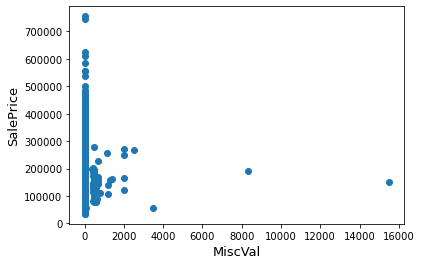

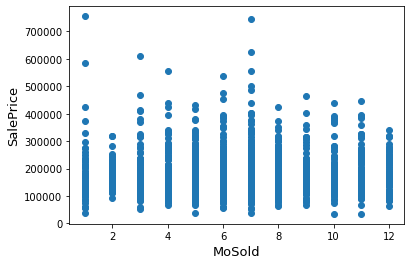

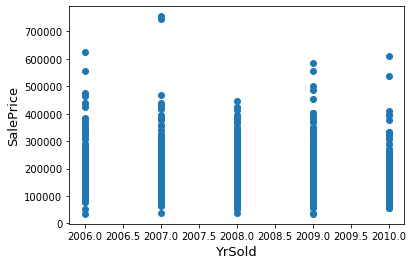

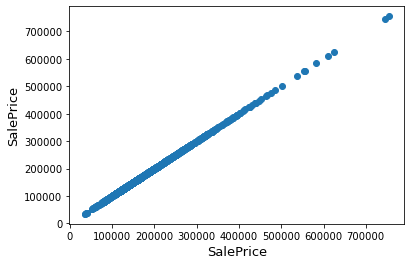

In [234]:
# Detekcija korelacije i outlajera
for n in numericki:
    fig, ax = plt.subplots()
    ax.scatter(x = train[n], y = train['SalePrice'])
    plt.ylabel('SalePrice', fontsize=13)
    plt.xlabel(n, fontsize=13)
plt.show()

In [235]:
# Podataka nema mnogo pa cemo ih rucno okloniti i analizirati
print(train.shape)
train = train.drop(train[train['LotFrontage']>300].index)
train = train.drop(train[train['LotArea']>200000].index)
train = train.drop(train[train['BsmtFinSF1']>5000].index)
train = train.drop(train[train['1stFlrSF']>4000].index)
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)
train = train.drop(train[train['WoodDeckSF']>800].index)
train = train.drop(train[train['EnclosedPorch']>500].index)
train = train.drop(train[train['3SsnPorch']>400].index)
train = train.drop(train[train['MiscVal']>8000].index)
print(train.shape)
# NOTE: Nakon izbacivanja OpenPorchSF, skroz se promenila raspodela

(1460, 80)
(1450, 80)


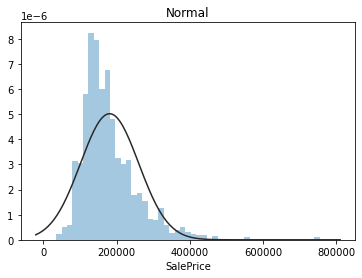

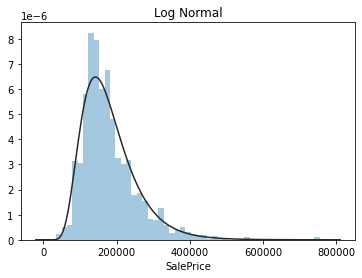

In [236]:
# Analiza ciljne promenljive
plt.figure(2); plt.title('Normal')
sb.distplot(y, kde=False, fit=scipy.stats.norm)
plt.figure(3); plt.title('Log Normal')
sb.distplot(y, kde=False, fit=scipy.stats.lognorm)

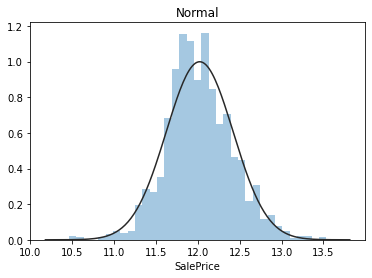

In [237]:
# Korekcija ciljne promenljive log(1+x), nakon predikcije, vraticemo transformaciju
train["SalePrice"] = np.log1p(train["SalePrice"])
plt.title('Normal')
sb.distplot(train['SalePrice'], kde=False, fit=scipy.stats.norm)
# Sada nam ciljna promenljiva ima priblizno normalnu raspodelu

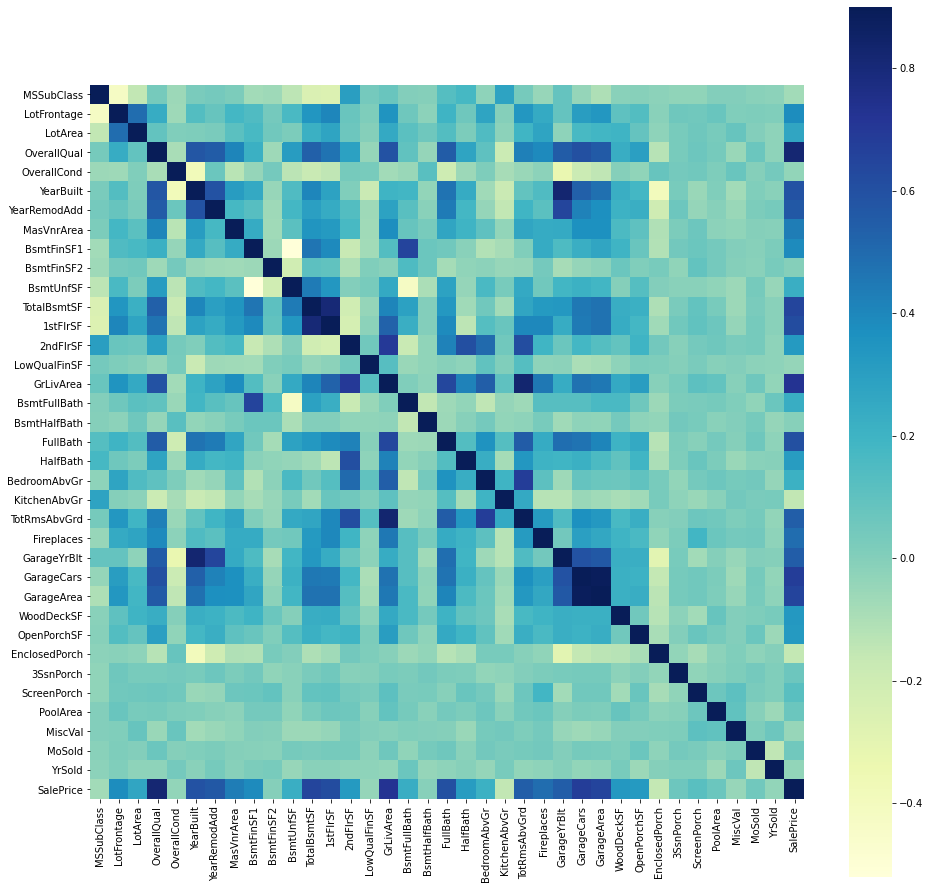

In [238]:
# Sada da vidimo korelacije u matrici
corrmat = train.corr()
plt.subplots(figsize=(16,16))
sb.heatmap(corrmat, vmax=0.9, square=True, cmap='YlGnBu')

### Korekcija tipova

In [239]:
train['MSSubClass'] = train['MSSubClass'].apply(str)
train['YrSold'] = train['YrSold'].astype(str)
train['MoSold'] = train['MoSold'].astype(str)

In [240]:
test['MSSubClass'] = test['MSSubClass'].apply(str)
test['YrSold'] = test['YrSold'].astype(str)
test['MoSold'] = test['MoSold'].astype(str)

## Nedostajuce vrednosti

In [241]:
# Dalje cemo sve statistike i istrazivanje vrsiti nad train podacima
# I eventualna skaliranja i odbacivanja raditi nad oba "naucena" na train
nd_train = (train.isnull().sum() / len(train)) * 100
nd_train = nd_train.drop(nd_train[nd_train == 0].index).sort_values(ascending=False)
nd_train_pd = pd.DataFrame({'Missing Ratio' :nd_train})
nd_train_pd

,Missing Ratio
PoolQC,99.655172
MiscFeature,96.413793
Alley,93.724138
Fence,80.689655
FireplaceQu,47.448276
LotFrontage,17.724138
GarageYrBlt,5.586207
GarageType,5.586207
GarageFinish,5.586207
GarageQual,5.586207


In [242]:
nd_test = (test.isnull().sum() / len(test)) * 100
nd_test = nd_test.drop(nd_test[nd_test == 0].index).sort_values(ascending=False)
nd_test_pd = pd.DataFrame({'Missing Ratio' :nd_test})
nd_test_pd

,Missing Ratio
PoolQC,99.794380
MiscFeature,96.504455
Alley,92.666210
Fence,80.123372
FireplaceQu,50.034270
LotFrontage,15.558602
GarageYrBlt,5.346127
GarageCond,5.346127
GarageQual,5.346127
GarageFinish,5.346127


Text(0.5, 1.0, 'Procenat nedostajucih vrednosti po atributu')

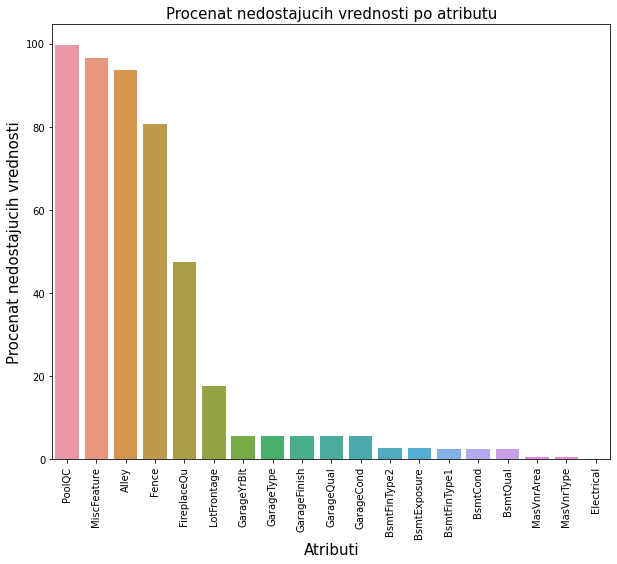

In [243]:
f, ax = plt.subplots(figsize=(10,8))
plt.xticks(rotation='90')
sb.barplot(x=nd_train.index, y=nd_train)
plt.xlabel('Atributi', fontsize=15)
plt.ylabel('Procenat nedostajucih vrednosti', fontsize=15)
plt.title('Procenat nedostajucih vrednosti po atributu', fontsize=15)

NaN u kolonama **PoolQC, MiscFeature, Alley, Fence, FireplaceQu**, verovatno znaci da nema bazena, sto ima smisla da popunimo sa None

In [244]:
train["PoolQC"] = train["PoolQC"].fillna("None")
test["PoolQC"] = test["PoolQC"].fillna("None")

train["MiscFeature"] = train["MiscFeature"].fillna("None")
test['MiscFeature'] = test["MiscFeature"].fillna("None")

train["Alley"] = train["Alley"].fillna("None")
test["Alley"] = test["Alley"].fillna("None")

train["Fence"] = train["Fence"].fillna("None")
test["Fence"] = test["Fence"].fillna("None")

train["FireplaceQu"] = train["FireplaceQu"].fillna("None")
test["FireplaceQu"] = test["FireplaceQu"].fillna("None")

In [245]:
# Otprilike 50% vremena na ovu funkciju da se izvede kako treba
def imput_mean_data(group_by_column, target_column):
    x = train.groupby(group_by_column)[target_column].mean()
    for (col, mean) in zip(x.index, x):
        train.loc[train[group_by_column] == col, target_column] = train.loc[train[group_by_column] == col, target_column].fillna(mean)
        test.loc[test[group_by_column] == col, target_column] = test.loc[test[group_by_column] == col, target_column].fillna(mean) 
    

### Popuniti nedostajuce podatke kolone LotFrontage - Linear Feet of Street property srednjom vrednoscu, ali grupisano po susedstvu


In [246]:
imput_mean_data("Neighborhood", "LotFrontage")

In [247]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    train[col] = train[col].fillna('None')
    test[col] = test[col].fillna('None')
    
    
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    train[col] = train[col].fillna(0)
    test[col] = test[col].fillna(0)

In [248]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    train[col] = train[col].fillna(0)
    test[col] = test[col].fillna(0)
    
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train[col] = train[col].fillna('None')
    test[col] = test[col].fillna('None')

In [249]:
train["MasVnrType"] = train["MasVnrType"].fillna("None")
test["MasVnrType"] = test["MasVnrType"].fillna("None")

train["MasVnrArea"] = train["MasVnrArea"].fillna(0)
test["MasVnrArea"] = test["MasVnrArea"].fillna(0)

In [250]:
# Otprilike 50% vremena na ovu funkciju da se izvede kako treba
def imput_mode_data(group_by_column, target_column):
    x = train.groupby(group_by_column)[target_column].agg(lambda x:x.value_counts().index[0])
    for (col, mode) in zip(x.index, x):
        train.loc[train[group_by_column] == col, target_column] = train.loc[train[group_by_column] == col, target_column].fillna(mode[0])
        test.loc[test[group_by_column] == col, target_column] = test.loc[test[group_by_column] == col, target_column].fillna(mode[0]) 
    

In [251]:
#train['MSZoning'] = train['MSZoning'].fillna(train['MSZoning'].mode()[0])
#test['MSZoning'] = test['MSZoning'].fillna(train['MSZoning'].mode()[0])
imput_mode_data("MSSubClass", "MSZoning")

In [252]:
train["Functional"] = train["Functional"].fillna("Typ")
test["Functional"] = test["Functional"].fillna("Typ")

In [253]:
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])
test['Electrical'] = test['Electrical'].fillna(train['Electrical'].mode()[0])

In [254]:
test['Utilities'] = test['Utilities'].fillna(train['Utilities'].mode()[0])

In [255]:
test['KitchenQual'] = test['KitchenQual'].fillna(train['KitchenQual'].mode()[0])

In [256]:
test['Exterior1st'] = test['Exterior1st'].fillna(train['Exterior1st'].mode()[0])
test['Exterior2nd'] = test['Exterior2nd'].fillna(train['Exterior2nd'].mode()[0])
test['SaleType'] = test['SaleType'].fillna(train['SaleType'].mode()[0])

In [257]:
# Provera za train i test
nd_train = (train.isnull().sum() / len(train)) * 100
nd_train = nd_train.drop(nd_train[nd_train == 0].index).sort_values(ascending=False)
nd_train_pd = pd.DataFrame({'Missing Ratio' :nd_train})
nd_train_pd

,Missing Ratio


In [258]:
nd_test = (test.isnull().sum() / len(test)) * 100
nd_test = nd_test.drop(nd_test[nd_test == 0].index).sort_values(ascending=False)
nd_test_pd = pd.DataFrame({'Missing Ratio' :nd_test})
nd_test_pd

,Missing Ratio


### Nakrivljeni (skew) atributi

In [259]:
numeric_feats = train_features.dtypes[train_features.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = train_features[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
PoolArea,16.965014
haspool,16.941176
3SsnPorch,8.105267
LowQualFinSF,7.735797
MiscVal,5.330137
KitchenAbvGr,4.010280
BsmtHalfBath,3.957306
ScreenPorch,3.170456
BsmtFinSF2,2.640446
EnclosedPorch,2.162022


In [260]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    train_features[feat] = boxcox1p(train_features[feat], lam)
    test_features[feat] = boxcox1p(train_features[feat], lam)

There are 43 skewed numerical features to Box Cox transform


### Feature engineering

In [261]:
y = train['SalePrice'].reset_index(drop=True)
train_features = train.drop(['SalePrice'], axis=1)
test_features = test

In [262]:
train_features = train_features.drop(['Utilities', 'Street', 'PoolQC',], axis=1)

train_features['YrBltAndRemod']=train_features['YearBuilt']+train_features['YearRemodAdd']
train_features['TotalSF']=train_features['TotalBsmtSF'] + train_features['1stFlrSF'] + train_features['2ndFlrSF']

train_features['Total_sqr_footage'] = (train_features['BsmtFinSF1'] + train_features['BsmtFinSF2'] +
                                 train_features['1stFlrSF'] + train_features['2ndFlrSF'])

train_features['Total_Bathrooms'] = (train_features['FullBath'] + (0.5 * train_features['HalfBath']) +
                               train_features['BsmtFullBath'] + (0.5 * train_features['BsmtHalfBath']))

train_features['Total_porch_sf'] = (train_features['OpenPorchSF'] + train_features['3SsnPorch'] +
                              train_features['EnclosedPorch'] + train_features['ScreenPorch'] +
                              train_features['WoodDeckSF'])

In [263]:
test_features = test_features.drop(['Utilities', 'Street', 'PoolQC',], axis=1)

test_features['YrBltAndRemod']=test_features['YearBuilt']+test_features['YearRemodAdd']
test_features['TotalSF']=test_features['TotalBsmtSF'] + test_features['1stFlrSF'] + test_features['2ndFlrSF']

test_features['Total_sqr_footage'] = (test_features['BsmtFinSF1'] + test_features['BsmtFinSF2'] +
                                 test_features['1stFlrSF'] + test_features['2ndFlrSF'])

test_features['Total_Bathrooms'] = (test_features['FullBath'] + (0.5 * test_features['HalfBath']) +
                               test_features['BsmtFullBath'] + (0.5 * test_features['BsmtHalfBath']))

test_features['Total_porch_sf'] = (test_features['OpenPorchSF'] + test_features['3SsnPorch'] +
                              test_features['EnclosedPorch'] + test_features['ScreenPorch'] +
                              test_features['WoodDeckSF'])

In [264]:
train_features['haspool'] = train_features['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
train_features['has2ndfloor'] = train_features['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
train_features['hasgarage'] = train_features['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
train_features['hasbsmt'] = train_features['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
train_features['hasfireplace'] = train_features['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [265]:
test_features['haspool'] = test_features['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
test_features['has2ndfloor'] = test_features['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
test_features['hasgarage'] = test_features['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
test_features['hasbsmt'] = test_features['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
test_features['hasfireplace'] = test_features['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [266]:
train_features.shape

(1450, 86)

In [267]:
test_features.shape

(1459, 86)

In [268]:
nd_test = (test.isnull().sum() / len(test)) * 100
nd_test = nd_test.drop(nd_test[nd_test == 0].index).sort_values(ascending=False)
nd_test_pd = pd.DataFrame({'Missing Ratio' :nd_test})
nd_test_pd

,Missing Ratio


In [269]:
final_train_features = pd.get_dummies(train_features).reset_index(drop=True)
final_train_features.shape

(1450, 330)

In [270]:
final_test_features = pd.get_dummies(test_features).reset_index(drop=True)
final_test_features.shape

(1459, 319)

In [271]:
# Get missing columns in the training test
missing_cols = set( final_train_features.columns ) - set( final_test_features.columns )
print(missing_cols)
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    final_test_features[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
final_test_features = final_test_features[final_train_features.columns]

{'GarageQual_Ex', 'RoofMatl_Roll', 'Exterior1st_ImStucc', 'Condition2_RRAn', 'Condition2_RRNn', 'Electrical_Mix', 'RoofMatl_Metal', 'Exterior2nd_Other', 'HouseStyle_2.5Fin', 'RoofMatl_Membran', 'Heating_Floor', 'Heating_OthW', 'MiscFeature_TenC', 'Exterior1st_Stone'}


In [272]:
final_test_features.shape

(1459, 330)

## Models

In [273]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor

In [274]:
#scaler = StandardScaler()

In [275]:
#scaler.fit(final_train_features)

In [276]:
##inal_train_features = scaler.transform(final_train_features)
##inal_test_features = scaler.transform(final_test_features)

In [310]:
ridge = linear_model.Ridge(alpha=0.1)

In [278]:
lasso = linear_model.Lasso(alpha=2)

In [311]:
def cv_rmse(model, X, kfolds):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)


In [280]:
cv_rmse(lasso, final_train_features, 5)

array([0.16242542, 0.16662242, 0.1669636 , 0.16915624, 0.1653517 ])

In [312]:
cv_rmse(ridge, final_train_features, 5)

array([0.12515754, 0.1277086 , 0.14061593, 0.11024095, 0.12254558])

In [282]:
gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =42)  

In [283]:
cv_rmse(gbr, final_train_features, 5)

array([0.10567052, 0.12345603, 0.12083772, 0.10492204, 0.11162003])

In [284]:
gbr.fit(final_train_features, y)

GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_depth=4,
                          max_features='sqrt', min_samples_leaf=15,
                          min_samples_split=10, n_estimators=3000,
                          random_state=42)

In [288]:
submission = pd.DataFrame()
submission['Id'] = test_ID
submission['SalePrice'] = np.expm1(gbr.predict(final_test_features))
submission.to_csv('gbr_basic.csv',index=False)

In [289]:
lasso.fit(final_train_features, y)

Lasso(alpha=2)

In [303]:
sum(list(map(lambda x: 0 if x == False else 1, [lasso.coef_ != 0][0])))


11

In [305]:
ridge.fit(final_train_features, y)

Ridge(alpha=3)

In [307]:
ridge.coef_

array([ 4.75911021e-04,  2.46472027e-06,  4.16507360e-02,  3.71208421e-02,
        9.41249899e-04, -5.39574373e-05,  1.47782406e-05,  1.42619698e-05,
        5.31198354e-06,  4.87226764e-06,  2.44462515e-05,  1.65060773e-05,
        1.57017107e-05,  9.78329669e-05,  1.30040749e-04,  3.46827040e-03,
       -4.65993458e-03,  7.30788120e-03,  1.85994699e-02, -6.27839227e-04,
       -3.53574309e-02,  2.00146451e-03,  6.23880349e-03,  1.25532539e-05,
        2.43598588e-02,  6.72610592e-05, -2.71671983e-05, -1.72119350e-05,
        1.45417485e-05,  1.70499433e-05,  1.30491225e-04,  2.40170628e-04,
       -1.29655194e-05,  8.87292464e-04,  5.66540466e-05,  5.17817298e-05,
        1.77459192e-02,  1.17703779e-04, -1.74278677e-02, -1.49477673e-02,
        2.80665578e-03, -2.91634576e-04,  7.62046388e-03,  4.08594413e-03,
       -6.96101013e-02, -1.23125013e-02,  5.71474559e-03,  1.48066443e-02,
       -3.67363533e-02,  1.43679199e-02, -1.72788112e-02,  2.81956551e-02,
       -4.50303001e-03,  

In [309]:
submission = pd.DataFrame()
submission['Id'] = test_ID
submission['SalePrice'] = np.expm1(ridge.predict(final_test_features))
submission.to_csv('ridge_basic.csv',index=False)